# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 100 баллов

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline


---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

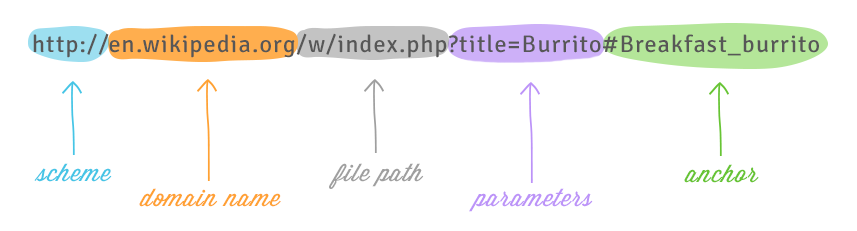

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

In [4]:
!pip install url_normalize

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [5]:
from url_normalize import url_normalize

In [6]:
#приведение к нижнему регистру
print(url_normalize('HTTP://www.MIPT.Ru/'))

#удаление порта по умолчанию (для протокола http это порт 80)
print(url_normalize('http://www.mipt.ru:80'))

#добавление косой черты
print(url_normalize('http://www.mipt.ru'))

#удаление символа "?" при пустом запросе
print(url_normalize('http://www.mipt.ru/?'))

http://www.mipt.ru/
http://www.mipt.ru/
http://www.mipt.ru/
http://www.mipt.ru/


_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a> и **скопируйте его в решение данной задачи**. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [7]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

In [8]:
import re

x = 0

RED_ARMY_PREFIXES = ['красн', 'арм', 'вооруж', 'ркка', 'войн', 'воен', 'воин', 'солдат', 'матрос', 
                         'оруди', 'ком', 'арм', 'кор', 'див', 'бриг', 'полк', 'бат', 'рот', 'взвод', 
                        'отдел', 'полит', 'инспектор', 'кав', 'маршал', 'генерал', 'старшин', 'лейтенант', 
                         'старший', 'кап', 'майор', 'подполковни', 'полковни', 'адмирал', 'техни', 'ворошилов',
                        'тухачевск', 'якир', 'троцк', 'сталин', 'будённ', 'егор', 'блюхер', 'тимошенко', 
                        'шапошников', 'фрунзе', 'чапаев', 'жуков', 'рокоссовск', 'конев', 'баграмян', 'котовск',
                        'щорс', 'каменев', 'василевск', 'толбухин', 'ватутин', 'шмидт', 'путн', 'корк',
                     'red', 'arm', 'war', 'milit', 'soldier', 'sail',  'gun', 'com', 'corp', 'brigade', 'navy', 'officer',
                     'regiment', 'battalion', 'compan', 'platoon', 'squad', 'inspect', 'marsha', 'general',
                     'lieutenant', 'sergeant', 'senior', 'captain', 'major', 'colonel', 'admiral', 
                     'voroshilov', 'tukhachevsky', 'yakir', 'trotsky', 'budyonny', 'yegorov', 'blyukher',
                     'timoshenko', 'shaposhnikov', 'frunze', 'chapayev', 'zhukov', 'rokossovsky', 'konev',
                     'bagramyan', 'kotovsky', 'shchors', 'kamenev', 'vasilevsky', 'tolbukhin', 'vatutin',
                     'putna', 'kork', 'stalin']

RED_ARMY_PERSONS_PREFIXES = ['ворошилов',
                        'тухачевск', 'якир', 'троцк', 'будённ', 'егор', 'блюхер', 'тимошенко', 
                        'шапошников', 'фрунзе', 'чапаев', 'жуков', 'рокоссовск', 'конев', 'баграмян', 'котовск',
                        'щорс', 'каменев', 'василевск', 'толбухин', 'ватутин', 'шмидт', 'путн', 'корк', 
                        'voroshilov', 'tukhachevsky', 'yakir', 'trotsky', 'budyonny', 'yegorov', 'blyukher',
                     'timoshenko', 'shaposhnikov', 'frunze', 'chapayev', 'zhukov', 'rokossovsky', 'konev',
                     'bagramyan', 'kotovsky', 'shchors', 'kamenev', 'vasilevsky', 'tolbukhin', 'vatutin',
                     'putna', 'kork', 'stalin']

def download_from_the_internet(url):
    #счётчик
    global x
    x += 1
    print(x)
    
    '''Скачивает сраницу с интернета

    Параметры:
        url (str) - ссылка на страницу для скачивания

    Возвращает:
        str - html-страница в виде строки, None в случае неудачи
    '''
    try:
        return urlopen(url).read().decode('utf-8')
    except KeyboardInterrupt:
        raise
    except:
        return None

    
def extract_links_from_html(url, html):
    '''Парсит ссылки на странице

    Принимает:
        url (str) - исходный урл страницы
        html (str) - содержание html-страницы

    Возвращает:
        list - список ссылок, находящихся на странице
    '''
    parser = BeautifulSoup(html)
    # Формируем ссылки на те страницы, на которые ссылается документ
    return [urljoin(url, link.get('href')) for link in parser.findAll('a')]

#проверяем, упоминается ли РККА в статье
def is_about_red_army(text_as_list):
    global RED_ARMY_PREFIXES
    if text_as_list is None:
        return False
    descr_words = text_as_list

    for word in descr_words:
        for prefix in RED_ARMY_PREFIXES:
            if word.startswith(prefix):
                return True
            
    return False

#проверяем, упоминаются ли выдающиеся деятели РККА в статье
def is_about_red_army_persons(text_as_list):
    global RED_ARMY_PERSONS_PREFIXES
    RED_ARMY_PREFIXES = RED_ARMY_PERSONS_PREFIXES
    if text_as_list is None:
        return False
    descr_words = text_as_list
    
    for word in descr_words:
        for prefix in RED_ARMY_PREFIXES:
            if word.startswith(prefix):
                return True
            
    return False


def extract_text_info_from_html(html):
    '''Парсит текстовую информацию на странице

    Принимает:
         html (str) - содержание html-страницы

    Возвращает:
        dict - текстовая часть страницы по ключу text,
               название по ключу title
    '''
    soup = BeautifulSoup(html, features="html.parser")
    for script in soup(["script", "style"]):
        script.extract()
    
    # Объединяем строки текста
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk for chunk in chunks if chunk)
    
    # Считаем количество слов в тексте
    text_as_list = re.findall('\w+', text)
    text_as_list = [w.lower() for w in text_as_list]
    count = len(text_as_list)

    # Находим название на странице
    title = soup.find('title').string
    
    # Проверяем принадлежность к категории "РККА"
    is_about_RKKA = is_about_red_army(text_as_list)
    
    # Проверяем принадлежность к категории "Выдающиеся деятели РККА"
    is_about_RKKA_persons = is_about_red_army_persons(text_as_list)
    
    
    
    return {'text': text, 'count_of_words': count, 'title': title, 'is_about_Red_Army': is_about_RKKA, 'is_about_Red_Army_persons': is_about_RKKA_persons}
    

def is_wiki_article(url_1):
    url = url_normalize(url_1)
    '''Проверяет, является ли ссылка страницей на simple.wikipedia'''
    if 'en.wikipedia' not in url:
        return False
    
    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help', 'File', 'Служебная', '#', 'disambiguation', 'Википедия',
                  'Категории', 'Специальная', 'Проверка_статей', 
                  'значения', 'Файл', 'Template', 'Talk']
    
    # Проверяем, есть ли запрещённые строки в ссылке
    for token in prohibited:
        if token in url:
            return False
        
    return True

import pandas as pd

Код обхода в ширину:

In [10]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)
        
        if (html == None):
            continue

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        
        count_of_url = len(children_links)
        
        
        time.sleep(1)
        
        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url

        #записываем количество исходящих url-ссылок
        text_info['count_of_children_url'] = count_of_url

        pages_json.append(text_info)

        #выводим название и ссылку страницы, чтобы при скачивании понимать, что именно скачивается и сколько уже скачалось
        print(text_info['title'])
        print(text_info['url'])

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите достаточно крупный сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** ищем статьи и связанные страницы про РККА на англоязычной Википедии, начинаем со статьи "Рабо́че-крестья́нская Кра́сная армия".

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** будем считать, что страница на Википедии относится к теме РККА, если в ней есть сочетание слов "Красная армия" (или эквивалентные ему "РККА", "Рабоче-крестьянская Красная армия") или военные, военно-исторические, военно-политические, государственные термины, относящиеся к 1918-1946 гг. (годы существования Рабоче-крестьянской Красной армии - от создания до переименования в Советскую).

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [11]:
data_js_pernons = load_web_pages('https://en.wikipedia.org/wiki/Marshal_of_the_Soviet_Union', 500, is_wiki_article)

1
Marshal of the Soviet Union - Wikipedia
https://en.wikipedia.org/wiki/Marshal_of_the_Soviet_Union
2
Marshal's star - Wikipedia
https://en.wikipedia.org/wiki/Marshal's_star
3
Soviet Union - Wikipedia
https://en.wikipedia.org/wiki/Soviet_Union
4
Soviet Army - Wikipedia
https://en.wikipedia.org/wiki/Soviet_Army
5
NATO - Wikipedia
https://en.wikipedia.org/wiki/NATO
6
Ranks and insignia of NATO - Wikipedia
https://en.wikipedia.org/wiki/Ranks_and_insignia_of_NATO
7
Generalissimus of the Soviet Union - Wikipedia
https://en.wikipedia.org/wiki/Generalissimus_of_the_Soviet_Union
8
Chief marshal of the branch - Wikipedia
https://en.wikipedia.org/wiki/Chief_marshal_of_the_branch
9
Army General (Soviet rank) - Wikipedia
https://en.wikipedia.org/wiki/Army_General_(Soviet_rank)
10
Admiral of the Fleet of the Soviet Union - Wikipedia
https://en.wikipedia.org/wiki/Admiral_of_the_fleet_of_the_Soviet_Union
11
Peaked cap - Wikipedia
https://en.wikipedia.org/wiki/Peaked_cap
12
Russian language - Wikipedi

Cделайте `pandas`-таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [12]:
df_persons = pd.DataFrame(data_js_pernons, columns=['text', 'count_of_words', 'title', 'url', 'count_of_children_url', 'is_about_Red_Army', 'is_about_Red_Army_persons'])
df_persons

,text,count_of_words,title,url,count_of_children_url,is_about_Red_Army,is_about_Red_Army_persons
0,Marshal of the Soviet Union - Wikipedia\nMarsh...,4806,Marshal of the Soviet Union - Wikipedia,https://en.wikipedia.org/wiki/Marshal_of_the_S...,687,True,True
1,Marshal's star - Wikipedia\nMarshal's star\nFr...,1287,Marshal's star - Wikipedia,https://en.wikipedia.org/wiki/Marshal's_star,150,True,True
2,Soviet Union - Wikipedia\nSoviet Union\nFrom W...,32945,Soviet Union - Wikipedia,https://en.wikipedia.org/wiki/Soviet_Union,4760,True,True
3,Soviet Army - Wikipedia\nSoviet Army\nFrom Wik...,4098,Soviet Army - Wikipedia,https://en.wikipedia.org/wiki/Soviet_Army,562,True,True
4,"NATO - Wikipedia\nNATO\nFrom Wikipedia, the fr...",15615,NATO - Wikipedia,https://en.wikipedia.org/wiki/NATO,2807,True,True
...,...,...,...,...,...,...,...
496,Operation Barbarossa - Wikipedia\nOperation Ba...,23896,Operation Barbarossa - Wikipedia,https://en.wikipedia.org/wiki/Operation_Barbar...,3395,True,True
497,Occupation of the Baltic states - Wikipedia\nO...,14495,Occupation of the Baltic states - Wikipedia,https://en.wikipedia.org/wiki/Occupation_of_th...,2249,True,True
498,Soviet occupation of Bessarabia and Northern B...,12647,Soviet occupation of Bessarabia and Northern B...,https://en.wikipedia.org/wiki/Soviet_occupatio...,1881,True,True
499,Battle of Berlin - Wikipedia\nBattle of Berlin...,11849,Battle of Berlin - Wikipedia,https://en.wikipedia.org/wiki/Battle_of_Berlin,1861,True,True


Определите, какой процент скачанных страниц принадлежит выбранной категории?

*Посмотрим, сколько лежит в бОльшей категории - "статьи, упоминающие о РККА", чтобы представлять, о чём статьи, не попавшие в основную категорию - "статьи, упоминающие о выдающихся деятелях РККА"*

In [13]:
grouped_by_Red_Army_flag = (df_persons.groupby('is_about_Red_Army').size() / len(df_persons)) * 100
grouped_by_Red_Army_flag

is_about_Red_Army
True    100.0
dtype: float64

In [14]:
grouped_by_Red_Army_persons_flag = (df_persons.groupby('is_about_Red_Army_persons').size() / len(df_persons)) * 100
grouped_by_Red_Army_persons_flag

is_about_Red_Army_persons
False    26.546906
True     73.453094
dtype: float64

*Видим, что все статьи выборки связаны с РККА, но не все - с её выдающимися деятелями. Учтём это.*

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

*Разобьём данные на две категории: статьи, упоминающие выдающихся деятелей РККА (далее - 1-ая категория), и остальные (далее - 2-ая) - это пригодится при построении графиков. Посчитаем вероятностные величины и напечатаем.*

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
df_persons_true = df_persons[df_persons['is_about_Red_Army_persons'] == True]
df_persons_true = df_persons_true.reset_index()
del df_persons_true['index']
df_persons_false = df_persons[df_persons['is_about_Red_Army_persons'] == False]
df_persons_false = df_persons_false.reset_index()
del df_persons_false['index']


median_common = np.median(df_persons['count_of_words'])
print('meadian_common', median_common)
median_true = np.median(df_persons_true['count_of_words'])
print('median_true', median_true)
median_false = np.median(df_persons_false['count_of_words'])
print('median_false', median_false)

mean_common = np.mean(df_persons['count_of_words'])
print('mean_common', mean_common)
mean_true = np.mean(df_persons_true['count_of_words'])
print('mean_true', mean_true)
mean_false = np.mean(df_persons_false['count_of_words'])
print('mean_false', mean_false)

disp_common = np.var(df_persons['count_of_words'])
print('disp_common', disp_common)
disp_true = np.var(df_persons_true['count_of_words'])
print('disp_true', disp_true)
disp_false = np.var(df_persons_false['count_of_words'])
print('disp_false', disp_false)

meadian_common 4335.0
median_true 4793.0
median_false 3532.0
mean_common 7297.612774451098
mean_true 8192.29347826087
mean_false 4822.105263157895
disp_common 62033502.15744162
disp_true 72387326.08778353
disp_false 25042401.432528693


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


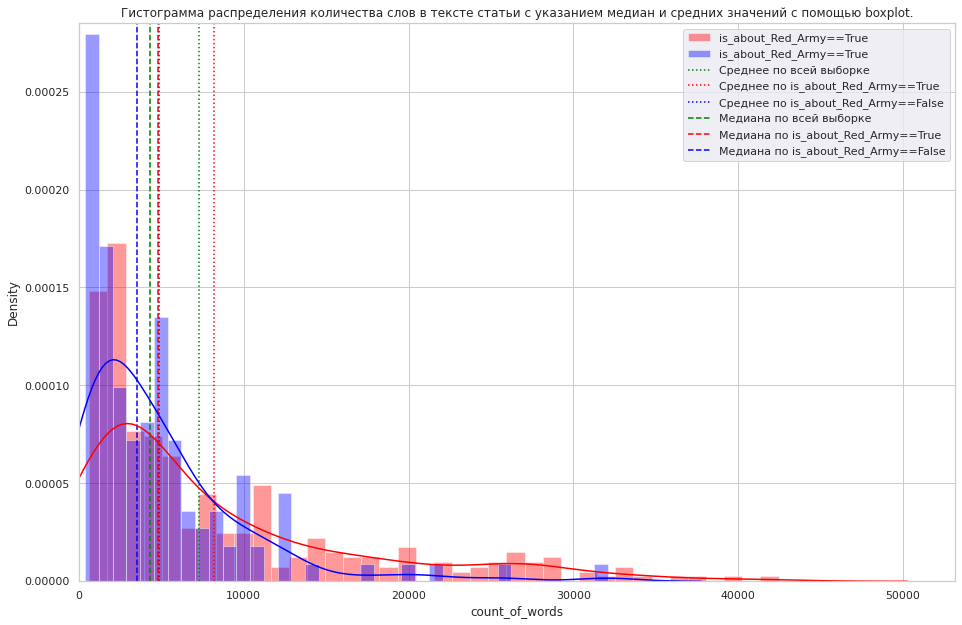

In [31]:
sns.set(rc={'figure.figsize':(15.7,10.27)})

local_up_board = 0.000285

with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
  plt.title('Гистограмма распределения количества слов в тексте статьи с указанием медиан и средних значений с помощью boxplot.')
  sns.distplot(x=df_persons_true['count_of_words'], bins=38, color='red', norm_hist=True, label='is_about_Red_Army==True')
  sns.distplot(x=df_persons_false['count_of_words'], bins=38, color='blue', norm_hist=True, label='is_about_Red_Army==True')

plt.vlines(x=mean_common, ymin=0, ymax=local_up_board, color='green', linestyle=':', label='Среднее по всей выборке')
plt.vlines(x=mean_true, ymin=0, ymax=local_up_board, color='red', linestyle=':', label='Среднее по is_about_Red_Army==True')
plt.vlines(x=mean_false, ymin=0, ymax=local_up_board, color='blue', linestyle=':', label='Среднее по is_about_Red_Army==False')
plt.vlines(x=median_common, ymin=0, ymax=local_up_board, color='green', linestyle='--', label='Медиана по всей выборке')
plt.vlines(x=median_true, ymin=0, ymax=local_up_board, color='red', linestyle='--', label='Медиана по is_about_Red_Army==True')
plt.vlines(x=median_false, ymin=0, ymax=local_up_board, color='blue', linestyle='--', label='Медиана по is_about_Red_Army==False')
plt.legend()
plt.xlim(0,)
plt.ylim(0, local_up_board)
plt.xlabel('count_of_words')
plt.show()


*Сузим рассматриваемые промежутки значений count_of_words - посмотрим поближе.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


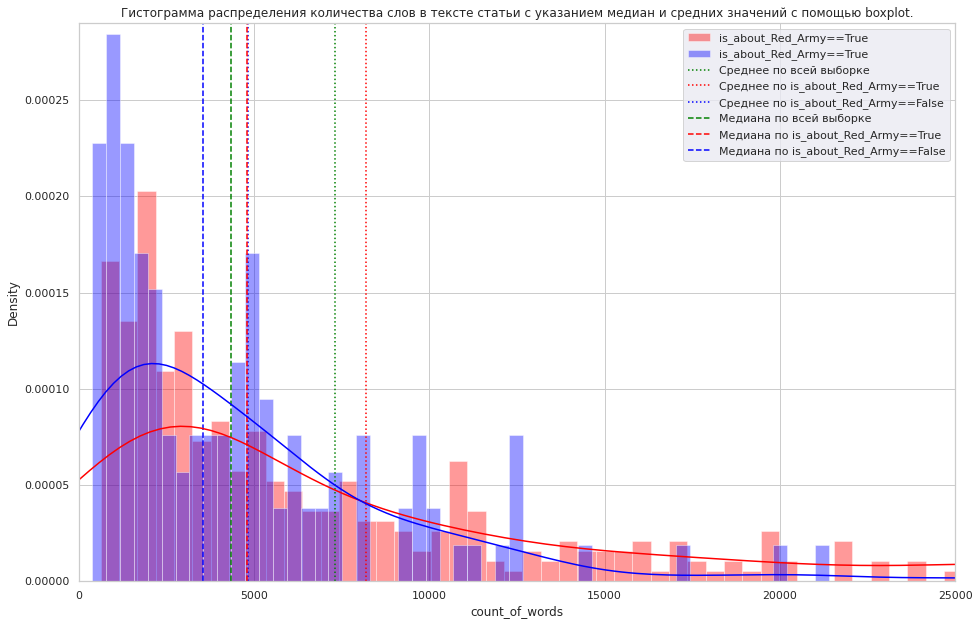

In [33]:
sns.set(rc={'figure.figsize':(15.7,10.27)})

local_up_board = 0.000290

with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
  plt.title('Гистограмма распределения количества слов в тексте статьи с указанием медиан и средних значений с помощью boxplot.')
  sns.distplot(x=df_persons_true['count_of_words'], bins=80, color='red', norm_hist=True, label='is_about_Red_Army==True')
  sns.distplot(x=df_persons_false['count_of_words'], bins=80, color='blue', norm_hist=True, label='is_about_Red_Army==True')

plt.vlines(x=mean_common, ymin=0, ymax=local_up_board, color='green', linestyle=':', label='Среднее по всей выборке')
plt.vlines(x=mean_true, ymin=0, ymax=local_up_board, color='red', linestyle=':', label='Среднее по is_about_Red_Army==True')
plt.vlines(x=mean_false, ymin=0, ymax=local_up_board, color='blue', linestyle=':', label='Среднее по is_about_Red_Army==False')
plt.vlines(x=median_common, ymin=0, ymax=local_up_board, color='green', linestyle='--', label='Медиана по всей выборке')
plt.vlines(x=median_true, ymin=0, ymax=local_up_board, color='red', linestyle='--', label='Медиана по is_about_Red_Army==True')
plt.vlines(x=median_false, ymin=0, ymax=local_up_board, color='blue', linestyle='--', label='Медиана по is_about_Red_Army==False')
plt.legend()
plt.xlim(0,25000)
plt.ylim(0, local_up_board)
plt.xlabel('count_of_words')
plt.show()

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

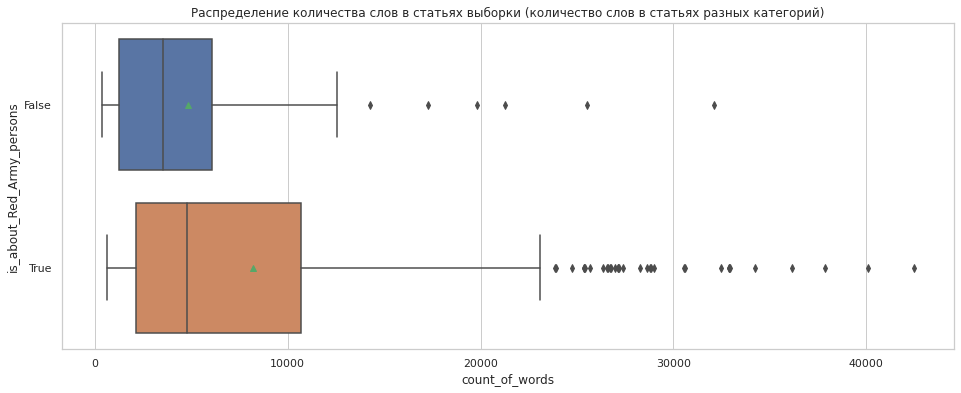

In [34]:
sns.set(rc={'figure.figsize':(16, 6)})

with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    plt.title(r'Распределение количества слов в статьях выборки (количество слов в статьях разных категорий)')
    sns.boxplot(data=df_persons, x='count_of_words', y='is_about_Red_Army_persons', orient='h', showmeans=True)

*Ещё один неплохой и понятный для интерпретации способ изобразить средние (зелёные треугольники на "коробке с усами") и медианы (чёрточки внутри "коробок с усами") на графике с гистограммами --- это совместить "ящики с усами" и гистограммы*

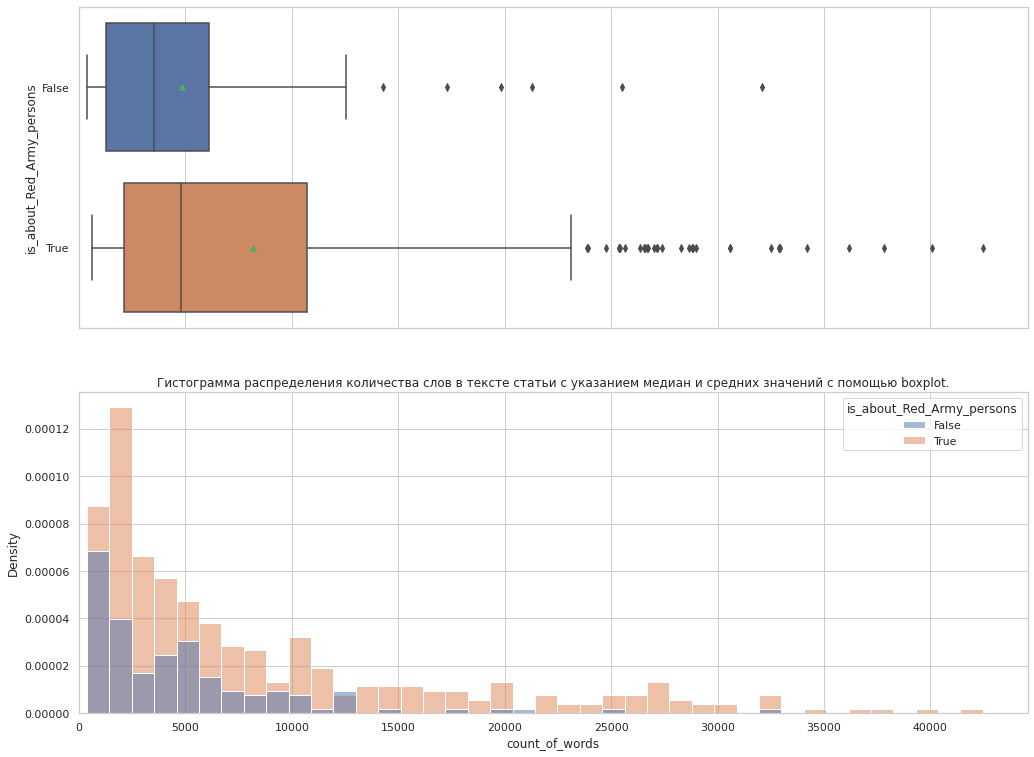

In [35]:
sns.set(rc={'figure.figsize':(17,13)})

with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
  f, (ax_box_1, ax_hist) = plt.subplots(2, sharex=True)
  sns.boxplot(data=df_persons, x='count_of_words', y='is_about_Red_Army_persons', orient='h', showmeans=True, ax=ax_box_1)
  plt.title('Гистограмма распределения количества слов в тексте статьи с указанием медиан и средних значений с помощью boxplot.')
  sns.histplot(data=df_persons, x='count_of_words', hue='is_about_Red_Army_persons', ax=ax_hist, bins=40,  stat='density')
  ax_box_1.set(xlabel='')

plt.xlim(0,)
plt.show()

*Снова сузим рассматриваемые промежутки значений count_of_words - посмотрим поближе.*

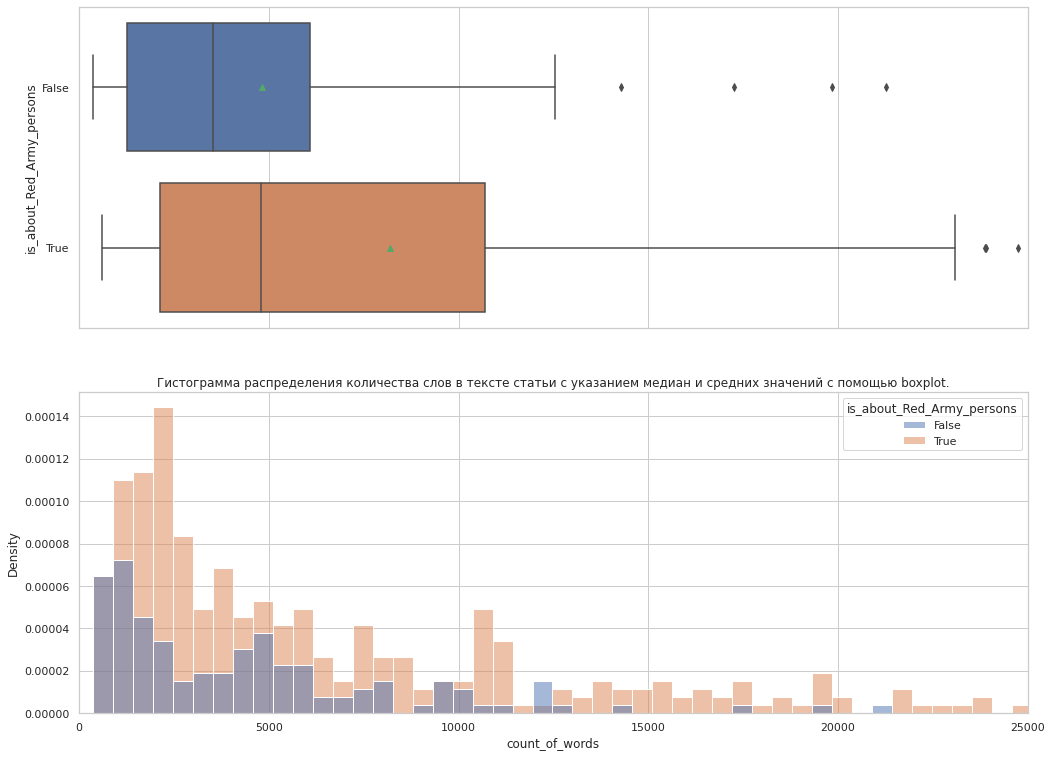

In [36]:
sns.set(rc={'figure.figsize':(17,13)})

with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
  f, (ax_box_1, ax_hist) = plt.subplots(2, sharex=True)
  sns.boxplot(data=df_persons, x='count_of_words', y='is_about_Red_Army_persons', orient='h', showmeans=True, ax=ax_box_1)
  plt.title('Гистограмма распределения количества слов в тексте статьи с указанием медиан и средних значений с помощью boxplot.')
  sns.histplot(data=df_persons, x='count_of_words', hue='is_about_Red_Army_persons', ax=ax_hist, bins=80,  stat='density')
  ax_box_1.set(xlabel='')

plt.xlim(0,25000)
plt.show()

*Для бОльшей ясности построим также количественную гистограмму:*

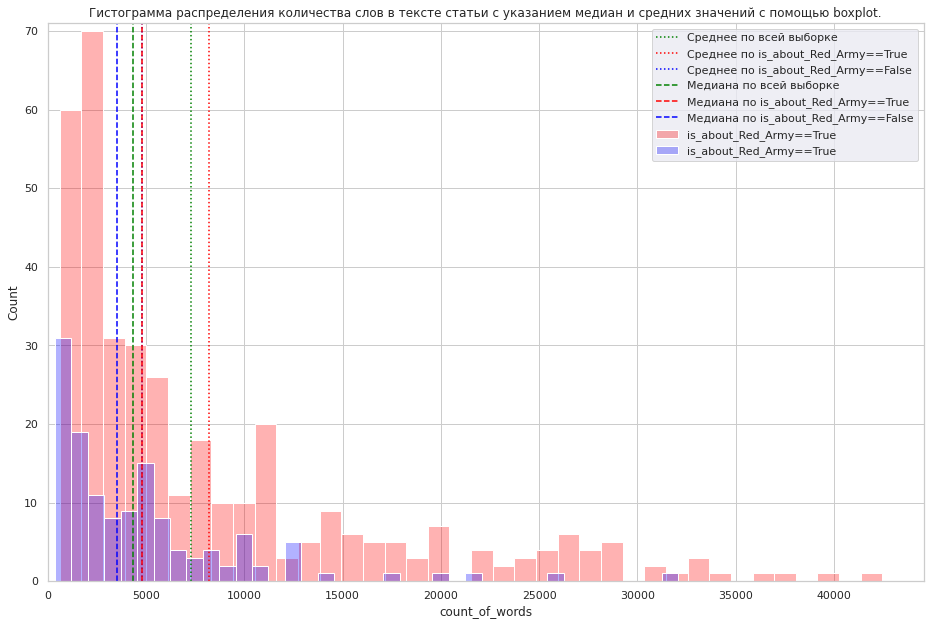

In [41]:
sns.set(rc={'figure.figsize':(15.7,10.27)})

local_up_board = 71

with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
  plt.title('Гистограмма распределения количества слов в тексте статьи с указанием медиан и средних значений с помощью boxplot.')
  sns.histplot(x=df_persons_true['count_of_words'], bins=38, color='red', label='is_about_Red_Army==True', alpha=0.3)
  sns.histplot(x=df_persons_false['count_of_words'], bins=38, color='blue', label='is_about_Red_Army==True', alpha=0.3)

plt.vlines(x=mean_common, ymin=0, ymax=local_up_board, color='green', linestyle=':', label='Среднее по всей выборке')
plt.vlines(x=mean_true, ymin=0, ymax=local_up_board, color='red', linestyle=':', label='Среднее по is_about_Red_Army==True')
plt.vlines(x=mean_false, ymin=0, ymax=local_up_board, color='blue', linestyle=':', label='Среднее по is_about_Red_Army==False')
plt.vlines(x=median_common, ymin=0, ymax=local_up_board, color='green', linestyle='--', label='Медиана по всей выборке')
plt.vlines(x=median_true, ymin=0, ymax=local_up_board, color='red', linestyle='--', label='Медиана по is_about_Red_Army==True')
plt.vlines(x=median_false, ymin=0, ymax=local_up_board, color='blue', linestyle='--', label='Медиана по is_about_Red_Army==False')
plt.legend()
plt.xlim(0,)
plt.ylim(0, local_up_board)
plt.xlabel('count_of_words')
plt.show()

*Видим явные пики у синих и оранжевых. Из показанного можно сделать вывод, что условно "обычная" статья с упоминанием выдающихся деятелей РККА объёмнее, что "обычная" статья без упоминания оных. Об этом нам говорят медианы, средние значения, сами графики: оранжевые столбики  на малых значениях count_of_word ниже синих, хотя на больших значениях count_of_words синие и оранжевые не сильно отличаются друг от друга.*

*Кроме того, в группе статей, упоминающих выдающихся деятелей РККА, количество статей с count_of_word, равным медианному, невелико относительно других значений count_of_words. Это наводит на мысль, что в этой группе статей велик "разброс" count_of_words. Формальным показателем неформального понятия "разброса" является дисперсия. Собственно, в группе (is_about_Red_Army_person == True) значение дисперсии довольно велико.*

*В то же время в группе статей, не упоминающих выдающихся деятелей РККА, медиана близка к району наиболее "популярных" значений, хотя и не совпадает с ним, что говорит о меньшем по сравнению с оранжевыми "разбросе". Опять-таки, математика это подтверждает - величина дисперсии на статьях (is_about_Red_Army_persons == False) меньше, чем в другой группе.*

*Несколько удобнее оказался первый способ (c гистограммой). Здесь не только чётко видно, что в статьях, упоминающих деятелей РККА в целом больше слов, чем в других статьях, посвящённых РККА, но есть возможноть примерно оценить, сколько статей имеет то или иное количество слов (на втором, например, не видно, что количество статей с упоминанием выдающихся деятелей РККА, имеющих count_of_words_, равный медианному по этой группе, довольно небольшое - а из этого можно сделать некоторые выводы, см.выше).*

*Почему же складывается такая ситуация со статьями обеих групп? Моё предположение состоит в том, что выдающиеся деятели РККА могут быть упомянуты в огромном количестве статей на огромное количество тем, а статьи про самих деятелей по понятным причинам очень часто огромны по объёму (здесь оба примера - этот и следующий - будут из русскоязычной Википедии) - https://ru.wikipedia.org/wiki/Ворошилов,_Климент_Ефремович, в то время как статьи без упоминания деятелей РККА, но связанные с армией, нередко посвящены очень "узкоспециализированному" предмету или явлению (было бы справедливо назвать их "статьями-коротышами") (пример: https://ru.wikipedia.org/wiki/Подъесаул).*

**3.** Визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. 

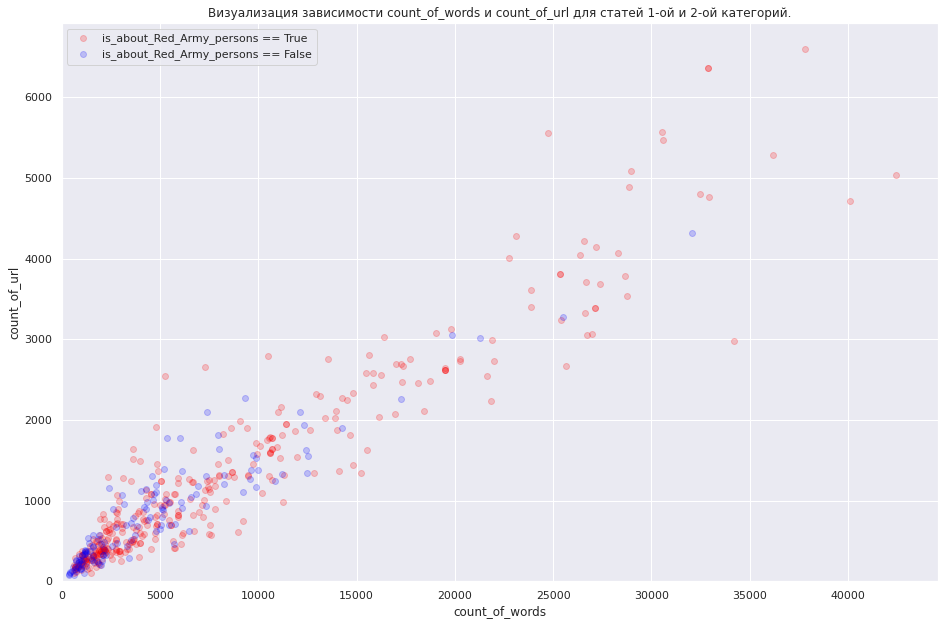

In [42]:
plt.scatter(x=df_persons_true['count_of_words'], y=df_persons_true['count_of_children_url'], c='red', alpha=0.2)
plt.scatter(x=df_persons_false['count_of_words'], y=df_persons_false['count_of_children_url'], c='blue', alpha=0.2)

plt.legend(['is_about_Red_Army_persons == True', 'is_about_Red_Army_persons == False'])
plt.xlabel('count_of_words')
plt.ylabel('count_of_url')
plt.xlim(0,)
plt.ylim(0,)
plt.title('Визуализация зависимости count_of_words и count_of_url для статей 1-ой и 2-ой категорий.')
plt.show()

*Некоторые выводы уже можно сделать, но хотелось бы чуть больше информативности. Для этого сузим рассматриваемые промежутки count_of_words и count_of_url, убрав тем самым из рассмотрения некоторые выбросы - очень объёмные статьи.*

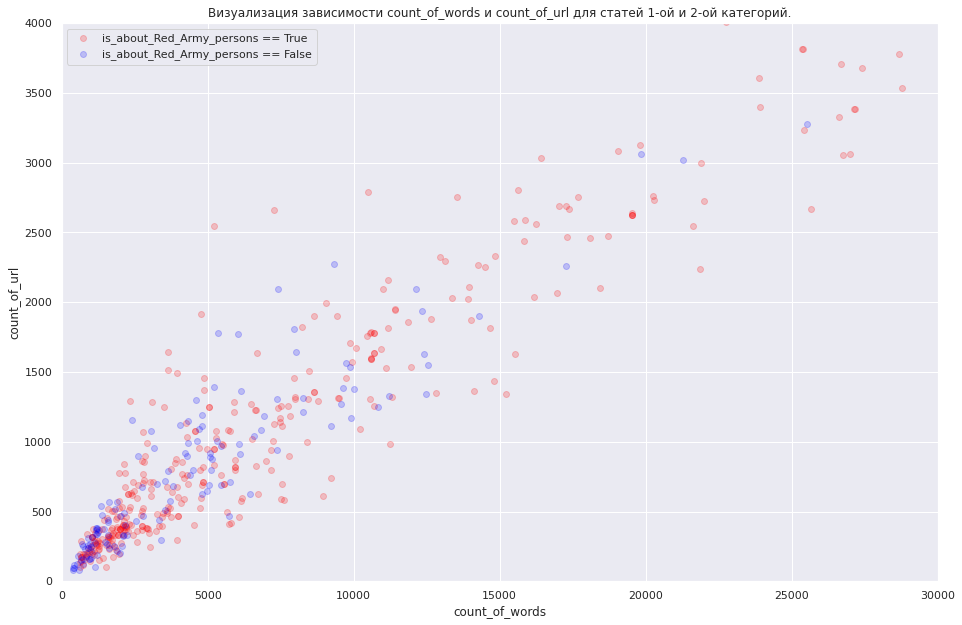

In [43]:
plt.scatter(x=df_persons_true['count_of_words'], y=df_persons_true['count_of_children_url'], c='red', alpha=0.2)
plt.scatter(x=df_persons_false['count_of_words'], y=df_persons_false['count_of_children_url'], c='blue', alpha=0.2)

plt.legend(['is_about_Red_Army_persons == True', 'is_about_Red_Army_persons == False'])
plt.xlabel('count_of_words')
plt.ylabel('count_of_url')
plt.xlim(0, 30000)
plt.ylim(0, 4000)
plt.title('Визуализация зависимости count_of_words и count_of_url для статей 1-ой и 2-ой категорий.')
plt.show()

 *Видим скопление и синих, и красных в районе небольших значений. В целом, заключение аналогично предыдущим графикам - многие статьи "синей" категории небольшие и среди малых статей больше "синих". На бОльших значениях явного различия нет. Распределение же в целом по координатной плоскости удовлетворяет простой логике: чем больше объём статьи, тем больше в ней url-ссылок.*

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

*Будем брать только те статьи, url которых содержит слова из RED_ARMY_PERSONS_PREFIXES в качестве подслов, а также некоторые другие слова (см. функцию). Новую функцию фильтрации назовём "is_wiki_article_about_Red_Army_Persons".*

In [44]:
# проверяем, содержит ли url нужные слова в качестве подслов
def is_Soviet_or_Red_or_person(url_1):
  url = url_normalize(url_1).lower()
  for item in RED_ARMY_PERSONS_PREFIXES:
    if item in url:
      return True

  # Сужаем поиск до статей с упоминанием Советов
  if 'soviet' in url:
    return True

  # Пригодятся статьи, в названии которых есть название того или иного советского города.
  # Например, про битвы за ЛенинГРАД, СталинГРАД, бои под ВорошиловГРАДом, КировоГРАДом...
  if 'grad' in url:
    return True
  
  # Пригодятся статьи про Великую Отечественную войну
  if 'patriotic' in url:
    return True

  # И про Гражданскую тоже
  if 'civil' in url:
    return True
    
  return False


def is_wiki_article_about_Red_Army_Persons(url_1):
    url = url_normalize(url_1)
    '''Проверяет, является ли ссылка страницей на en.wikipedia'''
    if 'en.wikipedia' not in url:
        return False
    
    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help', 'File', 'Служебная', '#', 'disambiguation', 'Википедия',
                  'Категории', 'Специальная', 'Проверка_статей', 
                  'значения', 'Файл', 'Template', 'Talk']
    
    # Проверяем, есть ли запрещённые строки в ссылке
    for token in prohibited:
        if token in url:
            # print(token)
            return False

    # вот здесь модификация
    if not is_Soviet_or_Red_or_person(url_normalize(url)):
          # print('mod', url)
          return False


    return True

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

*Добавим в функцию load_web_pages_updgraded недостающего функционала.*

In [45]:
import time

def load_web_pages_upgraded(seed_1, max_downloads, filtration_function):
    seed = url_normalize(seed_1)
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()

    # Будем класть в очередь словари, содержащие ссылку и глубину статьи в обходе. Это нужно для нового функционала.
    q.put({'url': seed, 'depth': 0})

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        q_get = q.get()
        main_url = url_normalize(q_get['url'])
        current_depth = q_get['depth']
        if main_url in already_visited:
            continue
        already_visited.add(main_url)

        # Считаем время, затраченное на скачивание страницы.
        time_line1 = time.perf_counter()
        html = download_from_the_internet(main_url)
        time_line2 = time.perf_counter()
        downloading_time = time_line2 - time_line1
        
        if (html == None):
            print("continue")
            continue
        
        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        
        # Запоминаем количество исходящих url-ссылок.
        count_of_url = len(children_links)
        
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        text_info['count_of_children_url'] = count_of_url

        # Добавляем данные для новых колонок.
        text_info['depth'] = current_depth
        text_info['downloading time'] = downloading_time

        pages_json.append(text_info)

        # Будем печатать название и ссылку на очередную распаршенную статью, чтобы понимать, что именно мы парсим и сколько уже распарсили.
        print(text_info['title'])
        print(text_info['url'])

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                # В очередь добавляем словрь.
                q.put({'url': url_normalize(child), 'depth': current_depth + 1})
                
    return pages_json


*Скачаем данные по-новому.*

In [46]:
x = 0
data_js_persons_new = load_web_pages_upgraded('https://en.wikipedia.org/wiki/Marshal_of_the_Soviet_Union', 500, is_wiki_article_about_Red_Army_Persons)
x = 0

1
Marshal of the Soviet Union - Wikipedia
https://en.wikipedia.org/wiki/Marshal_of_the_Soviet_Union
2
Soviet Union - Wikipedia
https://en.wikipedia.org/wiki/Soviet_Union
3
Soviet Army - Wikipedia
https://en.wikipedia.org/wiki/Soviet_Army
4
Generalissimus of the Soviet Union - Wikipedia
https://en.wikipedia.org/wiki/Generalissimus_of_the_Soviet_Union
5
Army General (Soviet rank) - Wikipedia
https://en.wikipedia.org/wiki/Army_General_(Soviet_rank)
6
Admiral of the Fleet of the Soviet Union - Wikipedia
https://en.wikipedia.org/wiki/Admiral_of_the_fleet_of_the_Soviet_Union
7
Admiral of the Fleet of the Soviet Union - Wikipedia
https://en.wikipedia.org/wiki/Admiral_of_the_Fleet_of_the_Soviet_Union
8
Joseph Stalin - Wikipedia
https://en.wikipedia.org/wiki/Joseph_Stalin
9
Mikhail Tukhachevsky - Wikipedia
https://en.wikipedia.org/wiki/Tukhachevsky
10
Semyon Budyonny - Wikipedia
https://en.wikipedia.org/wiki/Budyonny
11
Kliment Voroshilov - Wikipedia
https://en.wikipedia.org/wiki/Voroshilov
12


*Посмотрим, что получилось.*

In [47]:
df_persons_new = pd.DataFrame(data_js_persons_new, columns=['text', 'count_of_words', 'title', 'url', 'count_of_children_url', 'depth', 'downloading time', 'is_about_Red_Army', 'is_about_Red_Army_persons'])
df_persons_new

,text,count_of_words,title,url,count_of_children_url,depth,downloading time,is_about_Red_Army,is_about_Red_Army_persons
0,Marshal of the Soviet Union - Wikipedia\nMarsh...,4806,Marshal of the Soviet Union - Wikipedia,https://en.wikipedia.org/wiki/Marshal_of_the_S...,687,0,0.175375,True,True
1,Soviet Union - Wikipedia\nSoviet Union\nFrom W...,32945,Soviet Union - Wikipedia,https://en.wikipedia.org/wiki/Soviet_Union,4760,1,0.220761,True,True
2,Soviet Army - Wikipedia\nSoviet Army\nFrom Wik...,4098,Soviet Army - Wikipedia,https://en.wikipedia.org/wiki/Soviet_Army,562,1,0.118773,True,True
3,Generalissimus of the Soviet Union - Wikipedia...,931,Generalissimus of the Soviet Union - Wikipedia,https://en.wikipedia.org/wiki/Generalissimus_o...,209,1,0.103799,True,True
4,Army General (Soviet rank) - Wikipedia\nArmy G...,942,Army General (Soviet rank) - Wikipedia,https://en.wikipedia.org/wiki/Army_General_(So...,158,1,0.091641,True,False
...,...,...,...,...,...,...,...,...,...
496,23rd Politburo of the Communist Party of the S...,1617,23rd Politburo of the Communist Party of the S...,https://en.wikipedia.org/wiki/23rd_Politburo_o...,355,2,0.339578,True,True
497,24th Politburo of the Communist Party of the S...,1364,24th Politburo of the Communist Party of the S...,https://en.wikipedia.org/wiki/24th_Politburo_o...,322,2,0.229944,True,True
498,25th Politburo of the Communist Party of the S...,1553,25th Politburo of the Communist Party of the S...,https://en.wikipedia.org/wiki/25th_Politburo_o...,386,2,0.394913,True,True
499,26th Politburo of the Communist Party of the S...,1529,26th Politburo of the Communist Party of the S...,https://en.wikipedia.org/wiki/26th_Politburo_o...,343,2,0.222687,True,True


*Посчитаем, какой процент статей теперь, при новой функции фильтрации, упоминает в тексте РККА и какой относится к 1-ой категории.*

In [48]:
df_persons_new_grouped_by_Red_Army_flag = (df_persons_new.groupby('is_about_Red_Army').size() / len(df_persons_new)) * 100
df_persons_new_grouped_by_Red_Army_flag

is_about_Red_Army
True    100.0
dtype: float64

In [49]:
df_persons_new_grouped_by_Red_Army_persons_flag = (df_persons_new.groupby('is_about_Red_Army_persons').size() / len(df_persons_new)) * 100
df_persons_new_grouped_by_Red_Army_persons_flag

is_about_Red_Army_persons
False    15.369261
True     84.630739
dtype: float64

*WIN!*

Постройте гистограмму для времени скачивания страницы.

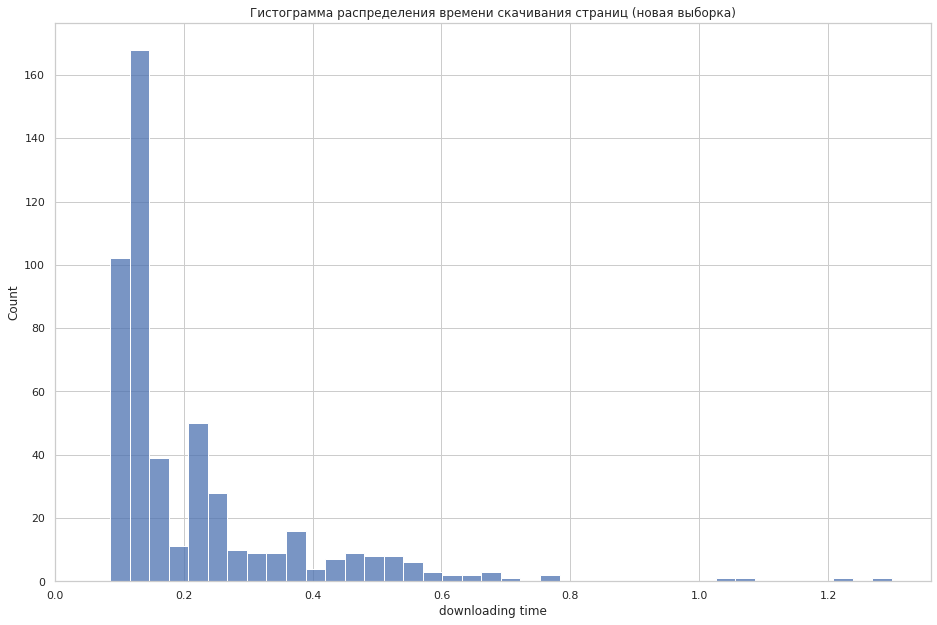

In [50]:
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
  plt.title('Гистограмма распределения времени скачивания страниц (новая выборка)')
  sns.histplot(data=df_persons_new, x='downloading time')
  plt.xlim(0,)
  plt.ylim(0,)

plt.show()

*Видим некоторое число выбросов (видимо, очёнь объёмных статей). Изменим промежутки построения графика и число бинов, чтобы получить более информативную картинку.*

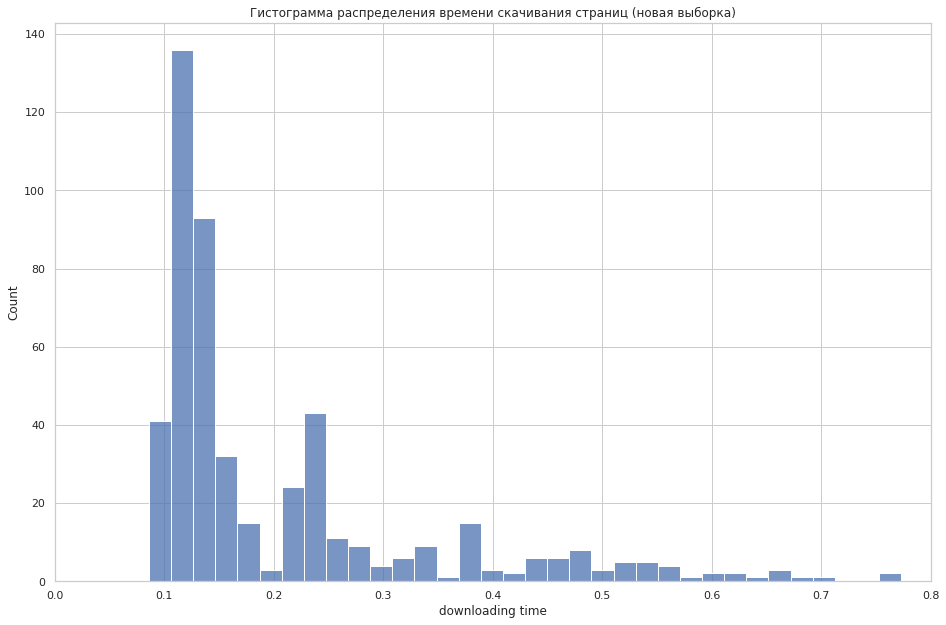

In [57]:
local_x_limit = 0.8

with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
  plt.title('Гистограмма распределения времени скачивания страниц (новая выборка)')
  sns.histplot(data=df_persons_new, x='downloading time', bins=60)
  plt.xlim(0, local_x_limit)
  plt.ylim(0,)

plt.show()

Предположите, каким известным вам стандартным распределением оно может быть приближено? 

*Предположу, что это ksone - распределение статистики одностороннего теста Колмогорова-Смирнова*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


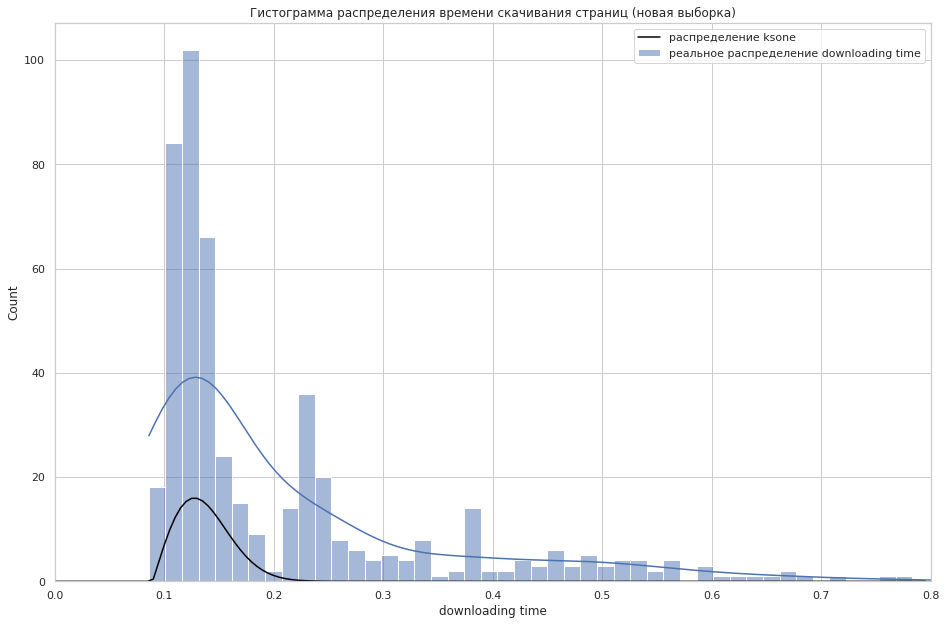

In [75]:
from scipy.stats import ksone

with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
  plt.title('Гистограмма распределения времени скачивания страниц (новая выборка)')
  sns.histplot(data=df_persons_new, x='downloading time', bins=80, kde=True, label='реальное распределение downloading time')
  plt.xlim(0, local_x_limit)
  plt.ylim(0,)

data = np.arange(0, local_x_limit, 0.005)
pdf = ksone.pdf(data, n=1e+03, loc=0.09, scale=2.4)

sns.set_style('whitegrid')
sns.lineplot(data, pdf , color = 'black', label='распределение ksone')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


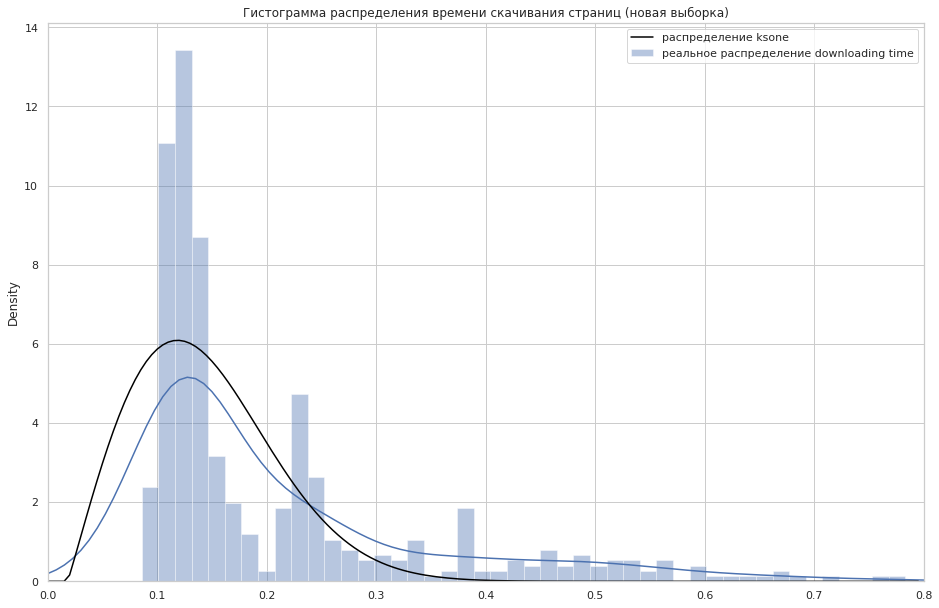

In [90]:
from scipy.stats import ksone

with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
  plt.title('Гистограмма распределения времени скачивания страниц (новая выборка)')
  sns.distplot(x=df_persons_new['downloading time'], bins=80, kde=True, label='реальное распределение downloading time')
  plt.xlim(0, local_x_limit)
  plt.ylim(0,)

data = np.arange(0, local_x_limit, 0.005)
pdf = ksone.pdf(data, n=1e+03, loc=0.02, scale=6.3)

sns.set_style('whitegrid')
sns.lineplot(data, pdf , color = 'black', label='распределение ksone')

plt.show()

*Действительно, предполагаемое распределение напоминает реальное.*

**Выводы:** 1) эксперимент потверждает гипотезу о том, что статья 2-ой категории скорее всего меньше статьи 1-ой категории по объёму, потому что 2-ая категория может включает малые статьи (см. часть про гистограмму и "ящики с усами");


 2) эксперимент показал, существует зависимость, напоминающая линейную, между объёмом статьи (количеством слов) и количеством дочерних url-ссылок, что потверждает утверждение: "чем больше статья, тем больше в ней url-ссылок" (см. часть с построением plt.scatter(); 

 2.1) как следствие (2), статья 2-ой категории скорее всего содержит меньшее количество url-ссылок, чем статья 1-ой категории; 

3) улучшение функции фильтрации позволило увеличить долю статей 1-ой категории в выборке (см. построение новой функции фильтрации и вычисление процента статей 1-ой категории в полученном с помощью этой функции датасете); 

4) предположительно, наиболее близким распределением оказался ksone - распределение статистики одностороннего теста Колмогорова-Смирнова.